C:\Users\pongp\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


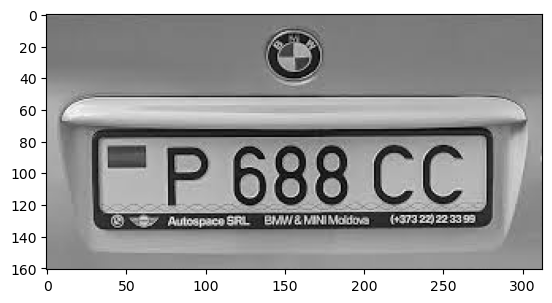

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils 
import easyocr

img = cv2.imread(r"C:\Users\pongp\Downloads\Senior\DataSet\download.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

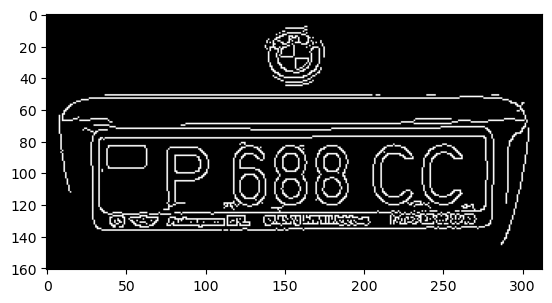

In [2]:
bfilter = cv2.bilateralFilter(gray, 11,17,17)
edged = cv2.Canny(bfilter, 30,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [3]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[177,  83]],

       [[170, 117]],

       [[183, 120]],

       [[190,  92]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255,-1)
new_image = cv2.bitwise_and(img, img, mask = mask)

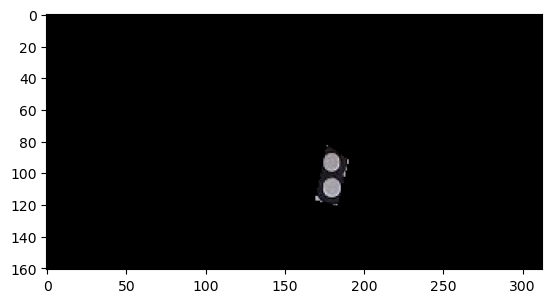

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))